In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import joblib

# Load your dataset (replace 'your_dataset.csv' with your actual dataset file)
df = pd.read_csv('BloomTaxonomy.csv')

# Assuming you have a function preprocess_text for text preprocessing
def preprocess_text(text):
    # Your text preprocessing logic here
    return preprocessed_text

# Preprocess the text in the 'Text' column
df['Processed_Text'] = df['Text'].apply(preprocess_text)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df['Processed_Text'],
    df['Label'],  # Replace 'Label' with the actual label column in your dataset
    test_size=0.2,  # You can adjust the test size
    random_state=42
)

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Save the trained model and vectorizer
joblib.dump(model, 'your_model.pkl')
joblib.dump(tfidf_vectorizer, 'your_vectorizer.pkl')

# Apply the model to the test set
X_test_tfidf = tfidf_vectorizer.transform(X_test)
predictions = model.predict(X_test_tfidf)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')

# Save the predictions to a new CSV file
df_test_predictions = pd.DataFrame({'Text': X_test, 'Actual_Label': y_test, 'Predicted_Label': predictions})
df_test_predictions.to_csv('test_predictions.csv', index=False)


NameError: name 'preprocessed_text' is not defined

In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import joblib

# Load your dataset (replace 'your_dataset.csv' with your actual dataset file)
df = pd.read_csv('BloomTaxonomy.csv')

# Assuming you have a function preprocess_text for text preprocessing
def preprocess_text(text):
    # Your text preprocessing logic here
    return text  # Update this line with your actual preprocessing logic

# Preprocess the text in the 'Text' column
df['Processed_Text'] = df['Text'].apply(preprocess_text)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df['Processed_Text'],
    df['Label'],  # Replace 'Label' with the actual label column in your dataset
    test_size=0.2,  # You can adjust the test size
    random_state=42
)

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Save the trained model and vectorizer
joblib.dump(model, 'your_model.pkl')
joblib.dump(tfidf_vectorizer, 'your_vectorizer.pkl')

# Apply the model to the test set
X_test_tfidf = tfidf_vectorizer.transform(X_test)
predictions = model.predict(X_test_tfidf)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')

# Save the predictions to a new CSV file
df_test_predictions = pd.DataFrame({'Text': X_test, 'Actual_Label': y_test, 'Predicted_Label': predictions})
df_test_predictions.to_csv('test_predictions.csv', index=False)


Accuracy: 0.75


Accuracy: 0.7416666666666667
Confusion Matrix:
[[12  2  0  2  0  1]
 [ 0 13  2  2  0  2]
 [ 0  0 18  0  0  2]
 [ 0  1  1 20  1  1]
 [ 1  2  2  4 14  0]
 [ 0  1  0  4  0 12]]
Classification Report:
               precision    recall  f1-score   support

     Analysis       0.92      0.71      0.80        17
  Application       0.68      0.68      0.68        19
Comprehension       0.78      0.90      0.84        20
   Evaluation       0.62      0.83      0.71        24
    Knowledge       0.93      0.61      0.74        23
    Synthesis       0.67      0.71      0.69        17

     accuracy                           0.74       120
    macro avg       0.77      0.74      0.74       120
 weighted avg       0.77      0.74      0.74       120



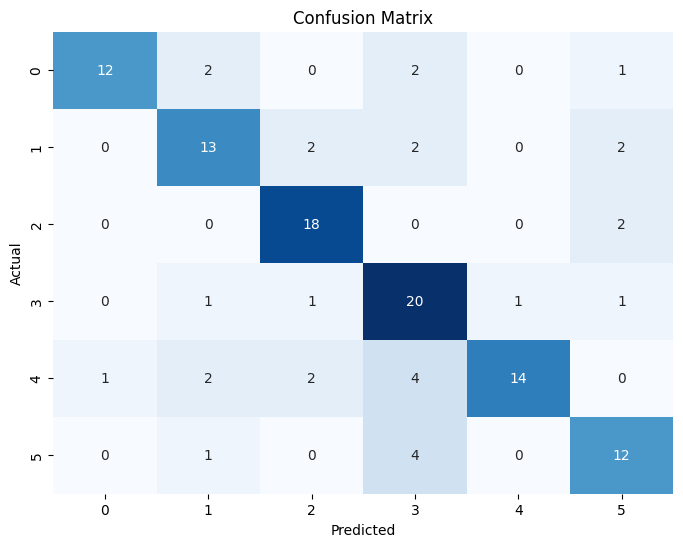

In [3]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load and preprocess data
# Assume you have a dataset with 'Text' and 'Label' columns
df = pd.read_csv('BloomTaxonomy.csv')  # Update with your dataset path
df.dropna(inplace=True)  # Handle missing values if any

import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming you have a DataFrame 'df' with columns 'Text' and 'Label'

# Step 1: Define your text preprocessing function
def preprocess_text(text):
    # Your text preprocessing logic here
    # For example, lowercasing and removing punctuation
    preprocessed_text = text.lower()
    preprocessed_text = ''.join([c for c in preprocessed_text if c.isalnum() or c.isspace()])
    return preprocessed_text

# Step 2: Apply the preprocessing function to the 'Text' column
df['Processed_Text'] = df['Text'].apply(preprocess_text)

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df['Processed_Text'],
    df['Label'],  # Replace 'Label' with the actual label column in your dataset
    test_size=0.2,  # You can adjust the test size
    random_state=42
)


# Step 5: Vectorize the text data
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Step 6: Build and train an NLP model
model = MultinomialNB()
model.fit(X_train_vec, y_train)

# Step 7: Make predictions on the test set
y_pred = model.predict(X_test_vec)

# Step 8: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Step 9: Display the results
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

# Step 10: Visualize the results (example with a confusion matrix heatmap)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [4]:
import pickle

# Assuming 'model' is your trained NLP model
with open('sentiment_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)


In [7]:
# Assuming you have a dataset with columns 'Text' and 'Label'
# Replace 'your_dataset.csv' with your actual dataset

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
import joblib

# Load your dataset
df = pd.read_csv('BloomTaxonomy.csv')

# Preprocess the text
def preprocess_text(text):
    # Your text preprocessing logic here
    return text

df['Processed_Text'] = df['Text'].apply(preprocess_text)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df['Processed_Text'],
    df['Label'],  # Replace 'Label' with the actual label column in your dataset
    test_size=0.2,
    random_state=42
)

# Create a text classification pipeline
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
accuracy = model.score(X_test, y_test)
print(f'Model Accuracy: {accuracy}')

# Save the model using joblib
joblib.dump(model, 'your_model.joblib')


Model Accuracy: 0.7333333333333333


['your_model.joblib']

new code me


In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC  # Support Vector Classifier
from sklearn.pipeline import make_pipeline
import joblib

# Load your dataset
df = pd.read_csv('BloomTaxonomy.csv')

# Preprocess the text
def preprocess_text(text):
    # Your text preprocessing logic here
    return text

df['Processed_Text'] = df['Text'].apply(preprocess_text)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df['Processed_Text'],
    df['Label'],  # Replace 'Label' with the actual label column in your dataset
    test_size=0.2,
    random_state=42
)

# Create a text classification pipeline with Support Vector Machine
model = make_pipeline(TfidfVectorizer(), SVC(kernel='linear'))  # You can adjust the kernel as needed

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
accuracy = model.score(X_test, y_test)
print(f'Model Accuracy: {accuracy}')

# Save the model using joblib
joblib.dump(model, 'your_model_svm.joblib')



Model Accuracy: 0.8166666666666667


['your_model_svm.joblib']

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
import joblib

# Load your dataset
df = pd.read_csv('BloomTaxonomy.csv')

# Preprocess the text
def preprocess_text(text):
    # Your text preprocessing logic here
    return text

df['Processed_Text'] = df['Text'].apply(preprocess_text)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df['Processed_Text'],
    df['Label'],  # Replace 'Label' with the actual label column in your dataset
    test_size=0.2,
    random_state=42
)

# Create a text classification pipeline with Random Forest
model = make_pipeline(TfidfVectorizer(), RandomForestClassifier(n_estimators=100, random_state=42))

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
accuracy = model.score(X_test, y_test)
print(f'Model Accuracy: {accuracy}')

# Save the model using joblib
joblib.dump(model, 'your_model_random_forest.joblib')


Model Accuracy: 0.7


['your_model_random_forest.joblib']

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline
import joblib

# Load your dataset
df = pd.read_csv('BloomTaxonomy.csv')

# Preprocess the text
def preprocess_text(text):
    # Your text preprocessing logic here
    return text

df['Processed_Text'] = df['Text'].apply(preprocess_text)

# Use LabelEncoder to encode string labels to numerical values
label_encoder = LabelEncoder()
df['Label'] = label_encoder.fit_transform(df['Label'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df['Processed_Text'],
    df['Label'],
    test_size=0.2,
    random_state=42
)

# Create a text classification pipeline with XGBoost
model = make_pipeline(TfidfVectorizer(), XGBClassifier(learning_rate=0.1, n_estimators=100, random_state=42))

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
accuracy = model.score(X_test, y_test)
print(f'Model Accuracy: {accuracy}')

# Save the model using joblib
joblib.dump(model, 'your_model_xgboost.joblib')

# Save the label encoder for later use
joblib.dump(label_encoder, 'label_encoder.joblib')


Model Accuracy: 0.8


['label_encoder.joblib']

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
import joblib

# Load your dataset
df = pd.read_csv('BloomTaxonomy.csv')

# Preprocess the text
def preprocess_text(text):
    # Your text preprocessing logic here
    return text

df['Processed_Text'] = df['Text'].apply(preprocess_text)

# Use LabelEncoder to encode string labels to numerical values
label_encoder = LabelEncoder()
df['Label'] = label_encoder.fit_transform(df['Label'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df['Processed_Text'],
    df['Label'],
    test_size=0.2,
    random_state=42
)

# Create a text classification pipeline with k-Nearest Neighbors
model = make_pipeline(TfidfVectorizer(), KNeighborsClassifier(n_neighbors=5))  # You can adjust the number of neighbors (k) as needed

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
accuracy = model.score(X_test, y_test)
print(f'Model Accuracy: {accuracy}')

# Save the model using joblib
joblib.dump(model, 'your_model_knn.joblib')

# Save the label encoder for later use
joblib.dump(label_encoder, 'label_encoder_knn.joblib')


Model Accuracy: 0.625


c:\Users\admin\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neighbors\_classification.py:187: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


['label_encoder_knn.joblib']

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
import joblib

# Load your dataset
df = pd.read_csv('BloomTaxonomy.csv')

# Preprocess the text
def preprocess_text(text):
    # Your text preprocessing logic here
    return text

df['Processed_Text'] = df['Text'].apply(preprocess_text)

# Use LabelEncoder to encode string labels to numerical values
label_encoder = LabelEncoder()
df['Label'] = label_encoder.fit_transform(df['Label'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df['Processed_Text'],
    df['Label'],
    test_size=0.2,
    random_state=42
)

# Create a text classification pipeline with Decision Tree
model = make_pipeline(TfidfVectorizer(), DecisionTreeClassifier(random_state=42))

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
accuracy = model.score(X_test, y_test)
print(f'Model Accuracy: {accuracy}')

# Save the model using joblib
joblib.dump(model, 'your_model_decision_tree.joblib')

# Save the label encoder for later use
joblib.dump(label_encoder, 'label_encoder_decision_tree.joblib')


Model Accuracy: 0.49166666666666664


['label_encoder_decision_tree.joblib']

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
import joblib

# Load your dataset
df = pd.read_csv('BloomTaxonomy.csv')

# Preprocess the text
def preprocess_text(text):
    # Your text preprocessing logic here
    return text

df['Processed_Text'] = df['Text'].apply(preprocess_text)

# Use LabelEncoder to encode string labels to numerical values
label_encoder = LabelEncoder()
df['Label'] = label_encoder.fit_transform(df['Label'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df['Processed_Text'],
    df['Label'],
    test_size=0.2,
    random_state=42
)

# Create a text classification pipeline with Support Vector Machine (SVM)
model = make_pipeline(TfidfVectorizer(), SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42))

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
accuracy = model.score(X_test, y_test)
print(f'Model Accuracy: {accuracy}')

# Save the model using joblib
joblib.dump(model, 'your_model_svm_rbf.joblib')

# Save the label encoder for later use
joblib.dump(label_encoder, 'label_encoder_svm_rbf.joblib')


Model Accuracy: 0.775


['label_encoder_svm_rbf.joblib']

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
import joblib

# Load your dataset
df = pd.read_csv('BloomTaxonomy.csv')

# Preprocess the text
def preprocess_text(text):
    # Your text preprocessing logic here
    return text

df['Processed_Text'] = df['Text'].apply(preprocess_text)

# Use LabelEncoder to encode string labels to numerical values
label_encoder = LabelEncoder()
df['Label'] = label_encoder.fit_transform(df['Label'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df['Processed_Text'],
    df['Label'],
    test_size=0.2,
    random_state=42
)

# Create a text classification pipeline with Logistic Regression
model = make_pipeline(TfidfVectorizer(), LogisticRegression(max_iter=1000, random_state=42))

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
accuracy = model.score(X_test, y_test)
print(f'Model Accuracy: {accuracy}')

# Save the model using joblib
joblib.dump(model, 'your_model_logistic_regression.joblib')

# Save the label encoder for later use
joblib.dump(label_encoder, 'label_encoder_logistic_regression.joblib')


Model Accuracy: 0.75


['label_encoder_logistic_regression.joblib']

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
import joblib

# Load your dataset
df = pd.read_csv('BloomTaxonomy.csv')

# Preprocess the text
def preprocess_text(text):
    # Your text preprocessing logic here
    return text

df['Processed_Text'] = df['Text'].apply(preprocess_text)

# Use LabelEncoder to encode string labels to numerical values
label_encoder = LabelEncoder()
df['Label'] = label_encoder.fit_transform(df['Label'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df['Processed_Text'],
    df['Label'],
    test_size=0.2,
    random_state=42
)

# Create a text classification pipeline with Multilayer Perceptron (MLP)
model = make_pipeline(TfidfVectorizer(), MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42))

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
accuracy = model.score(X_test, y_test)
print(f'Model Accuracy: {accuracy}')

# Save the model using joblib
joblib.dump(model, 'your_model_mlp.joblib')

# Save the label encoder for later use
joblib.dump(label_encoder, 'label_encoder_mlp.joblib')


Model Accuracy: 0.7083333333333334


['label_encoder_mlp.joblib']